---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    df = pd.read_csv('assets/fraud_data.csv')
    seg = df.iloc[:,-1]
    return float(seg[seg.values==1].count()/seg.count())

answer_one()


0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_dummy_pred = dummy_majority.predict(X_test)
    return (accuracy_score(y_test, y_dummy_pred), recall_score(y_test, y_dummy_pred))
    
answer_two()
    
 

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    
    svc_classifier = SVC()
    svc_classifier.fit(X_train,y_train)
    
    y_pred = svc_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return(accuracy, recall, precision)
    
    
answer_three()
    

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
    svm_pred = svm.decision_function(X_test) > -220
    
    confusion_matx = confusion_matrix(y_test, svm_pred)
    return confusion_matx

answer_four()
    

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [16]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve

    lr = LogisticRegression().fit(X_train, y_train)
    
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    
#     lr_predicted = lr.predict(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero_p = np.argmin(np.abs(precision-0.75))
#     closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero_p]
    
#     print(closest_zero_r)
    
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
#     roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
#     closest_zero_p = precision[closest_zero]
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]
    
#     print(closest_zero_tpr_lr)

    
#     y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
    
#     confusion = confusion_matrix(y_test, lr_predicted)

    ans = (closest_zero_r, closest_zero_tpr_lr)
    
    return ans
answer_five()

(0.825, 0.9875)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def answer_six():    
    lr = LogisticRegression(solver='liblinear')
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}
    grid_clf_rec = GridSearchCV(lr, param_grid=grid_values, scoring='recall')
    grid_clf_rec.fit(X_train, y_train)
    result = np.array(grid_clf_rec.cv_results_['mean_test_score']).reshape(4, 2)
    return result

# Llamar a la función y mostrar la matriz resultante
array_result = answer_six()
print(array_result)


[[0.69558442 0.77168831]
 [0.80792208 0.81155844]
 [0.80428571 0.81149351]
 [0.80064935 0.80064935]]


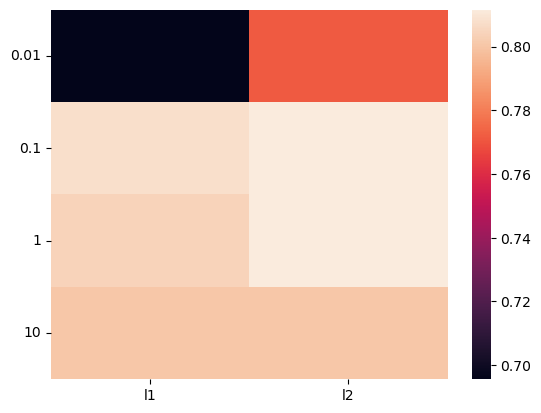

In [18]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())